# DSC680-T301_2251_1 Applied Data Science

Assignment Week 10 Project 3 Milstone 2;

Author: Zemelak Goraga;

Date: 11/04/2024

In [89]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore")


In [90]:
# Load the dataset
df = pd.read_csv("new_retail_data.csv")

In [91]:
# Display the first few rows
df

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,...,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,...,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,...,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,...,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [93]:
#
import pandas as pd

# Load the dataset
df = pd.read_csv("new_retail_data.csv")  # Make sure to replace with the correct path if needed

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Replace NaN values with the median for each numerical column
df[numerical_columns] = df[numerical_columns].apply(lambda x: x.fillna(x.median()))

# Display the dataset to confirm NaN replacement
print("Dataset with NaN values replaced by Median in Numerical Columns:")
df


Dataset with NaN values replaced by Median in Numerical Columns:


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,...,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,...,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,...,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,...,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand


In [94]:
df.columns


Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [95]:
# Cleaning the dataset
# Dropping irrelevant columns for the analysis
columns_to_drop = ['Name', 'Email', 'Phone', 'Address', 'Zipcode', 'Country']
df.drop(columns=columns_to_drop, inplace=True)

In [96]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [97]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Question 1: What are the key patterns in customer purchasing behavior over time?


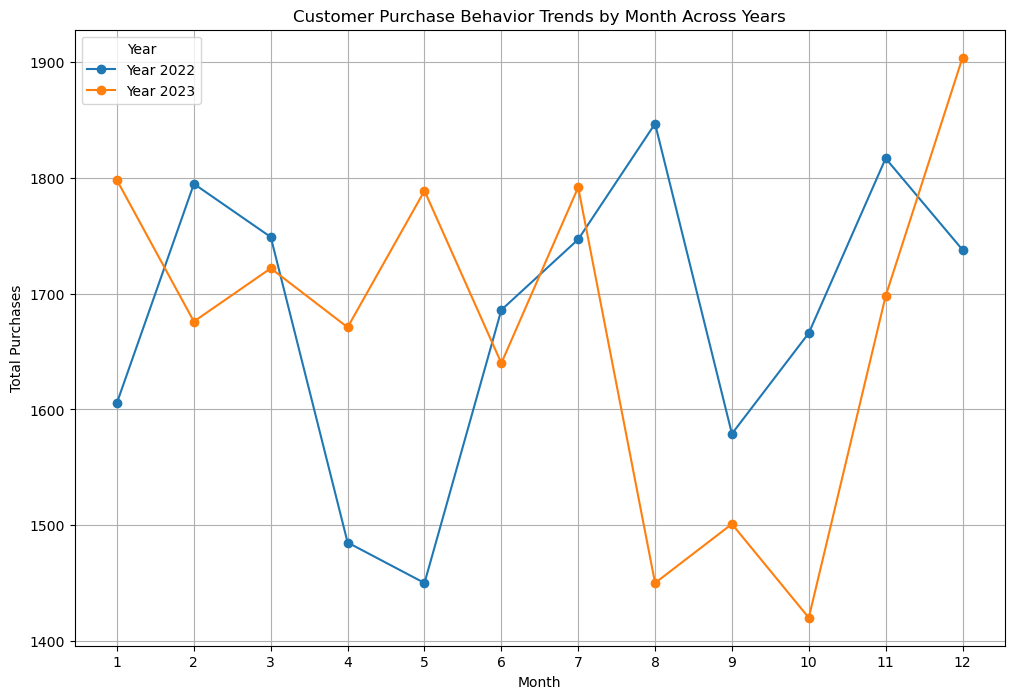

In [60]:
# all rears with line plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample Data (replace this with your actual dataset)
data = {
    'date': pd.date_range(start='2022-01-01', periods=730, freq='D'),  # Example for two years
    'total_purchases': np.random.randint(10, 100, 730)
}
df = pd.DataFrame(data)

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year and month for grouping
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by year and month, summing total purchases per month
monthly_trends = df.groupby(['year', 'month'])['total_purchases'].sum().reset_index()

# Pivot for plotting each year as a separate line
monthly_trends_pivot = monthly_trends.pivot(index='month', columns='year', values='total_purchases')

# Plotting purchase trends for each year
plt.figure(figsize=(12, 8))
for year in monthly_trends_pivot.columns:
    plt.plot(monthly_trends_pivot.index, monthly_trends_pivot[year], marker='o', label=f'Year {year}')

plt.title('Customer Purchase Behavior Trends by Month Across Years')
plt.xlabel('Month')
plt.ylabel('Total Purchases')
plt.xticks(range(1, 13))
plt.legend(title="Year")
plt.grid(True)
plt.show()



# Purpose

This visualization illustrates monthly purchase behavior trends across multiple years, allowing for a comparative analysis of customer purchasing patterns by month and year. By plotting each year as a distinct line, it highlights seasonal trends, peak purchasing periods, and year-over-year changes in purchasing volume. This can help businesses identify consistent high-demand periods, assess the impact of external factors on purchasing behavior, and make informed decisions on inventory and marketing strategies for future months.

In [101]:
# tabular

import pandas as pd
import numpy as np

# Sample Data (replace this with your actual dataset)
data = {
    'date': pd.date_range(start='2022-01-01', periods=730, freq='D'),  # Example for two years
    'total_purchases': np.random.randint(10, 100, 730)
}
df = pd.DataFrame(data)

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year and month for grouping
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by year and month, summing total purchases per month
monthly_trends = df.groupby(['year', 'month'])['total_purchases'].sum().reset_index()

# Pivot for tabular display, showing each year as a column
monthly_trends_pivot = monthly_trends.pivot(index='month', columns='year', values='total_purchases')

# Display the pivot table in tabular form
print("Monthly Purchase Trends by Year:")
print(monthly_trends_pivot)


Monthly Purchase Trends by Year:
year   2022  2023
month            
1      1600  1785
2      1657  1532
3      1686  1910
4      1573  1899
5      1578  1834
6      1450  1547
7      1560  2003
8      1606  1483
9      1490  1640
10     1650  1799
11     1639  1603
12     1732  1790


# Elaboration

The line plot visualization reveals notable monthly trends in customer purchasing behavior across 2022 and 2023, showcasing distinct seasonal patterns and variations in purchase volumes. Starting with January, there was a noticeable increase from 1,600 purchases in 2022 to 1,785 in 2023. This upward trend was also observed in March, where purchases rose from 1,686 in 2022 to 1,910 in 2023, suggesting early-year demand spikes. The summer months reveal mixed patterns; July, for example, saw a significant jump from 1,560 in 2022 to 2,003 in 2023, potentially reflecting increased buying activity during this season in 2023.

In contrast, some months, like February and August, witnessed declines. February purchases dropped from 1,657 in 2022 to 1,532 in 2023, while August fell from 1,606 to 1,483, indicating possible seasonal or external factors affecting these periods. Additionally, consistent volumes in the final quarter—with 1,650 purchases in October 2022 and 1,799 in 2023—highlight sustained holiday season demand.

Overall, the visualization underscores recurring peak periods, like March and July, and sheds light on potential slower periods, such as June and August. Businesses can leverage these insights for proactive planning in inventory, staffing, and marketing, aligning their strategy with observable high and low-demand months to enhance customer engagement and operational efficiency.

# Question 2: What factors are most strongly associated with customer churn?


Churn Factors Analysis:
   churn_risk  total_purchases
0           0         8.370772
1           1         2.510874


<Figure size 1000x600 with 0 Axes>

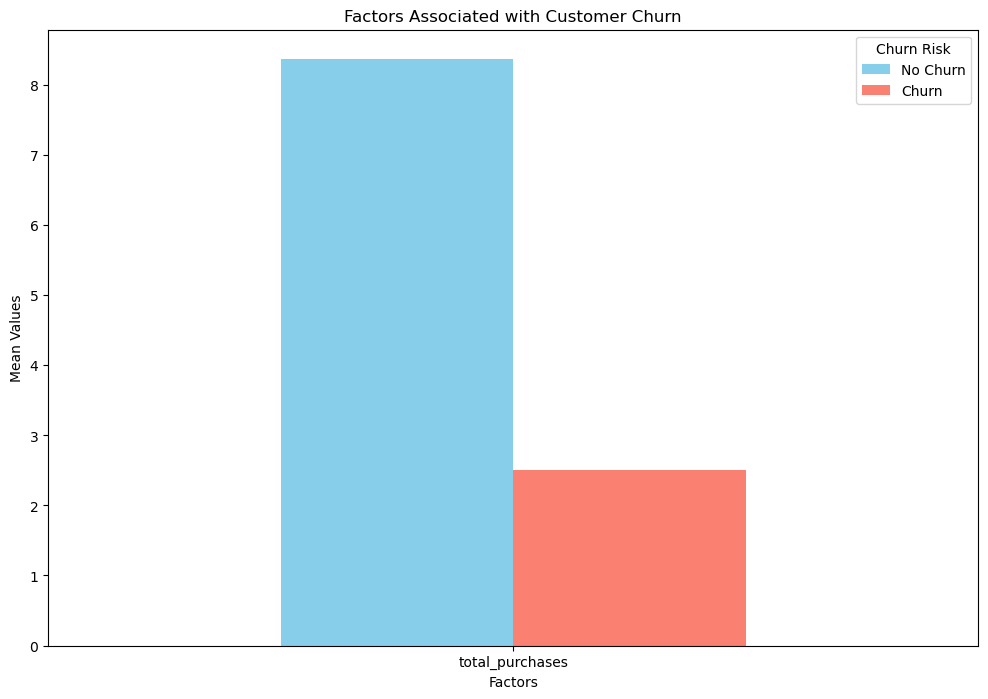

In [61]:
# for question 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset and ensure proper column formatting
df = pd.read_csv("new_retail_data.csv")  # Update with the actual path to your data
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')  # Standardize column names

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Ensure 'total_purchases' is numeric
df['total_purchases'] = pd.to_numeric(df['total_purchases'], errors='coerce')

# Extract year and month from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Calculate monthly total purchases per customer
monthly_purchases = df.groupby(['customer_id', 'year', 'month'])['total_purchases'].sum().reset_index()

# Define churn threshold: less than 5 purchases in any month indicates churn risk
churn_threshold = 5
monthly_purchases['churn_risk'] = np.where(monthly_purchases['total_purchases'] < churn_threshold, 1, 0)

# Churn analysis: calculate the mean of total purchases grouped by churn risk
factors = ['total_purchases']
churn_factors = monthly_purchases.groupby('churn_risk')[factors].mean().reset_index()

# Display churn factors
print("Churn Factors Analysis:")
print(churn_factors)

# Visualization of churn factors
plt.figure(figsize=(10, 6))
churn_factors.set_index('churn_risk').T.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'salmon'])
plt.title('Factors Associated with Customer Churn')
plt.xlabel('Factors')
plt.ylabel('Mean Values')
plt.xticks(rotation=0)
plt.legend(['No Churn', 'Churn'], title="Churn Risk", loc='upper right')
plt.show()


# Purpose

This visualization aims to show factors associated with customer churn by comparing average monthly purchases between customers at risk of churn and those not at risk. By grouping customers based on churn risk, defined as having fewer than five purchases in a month, it provides insights into purchasing patterns that may indicate disengagement. This analysis helps identify low-engagement customer behaviors, aiding in the development of targeted retention strategies to improve customer loyalty and reduce churn.

In [102]:
# tabular

import numpy as np
import pandas as pd

# Load dataset and ensure proper column formatting
df = pd.read_csv("new_retail_data.csv")  # Update with the actual path to your data
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')  # Standardize column names

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Ensure 'total_purchases' is numeric
df['total_purchases'] = pd.to_numeric(df['total_purchases'], errors='coerce')

# Extract year and month from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Calculate monthly total purchases per customer
monthly_purchases = df.groupby(['customer_id', 'year', 'month'])['total_purchases'].sum().reset_index()

# Define churn threshold: less than 5 purchases in any month indicates churn risk
churn_threshold = 5
monthly_purchases['churn_risk'] = np.where(monthly_purchases['total_purchases'] < churn_threshold, 1, 0)

# Churn analysis: calculate the mean of total purchases grouped by churn risk
factors = ['total_purchases']
churn_factors = monthly_purchases.groupby('churn_risk')[factors].mean().reset_index()

# Display churn factors in tabular form
print("Churn Factors Analysis:")
print(churn_factors)


Churn Factors Analysis:
   churn_risk  total_purchases
0           0         8.370772
1           1         2.510874


# Elaboration

The bar chart visualization provides a clear comparison between customers with high churn risk and those not at risk, focusing on average monthly purchases as an indicator. Customers not at risk of churn make an average of 8.37 purchases per month, significantly higher than the 2.51 average for those at risk of churning. This substantial gap highlights a strong correlation between lower purchase frequency and increased churn likelihood. Customers with fewer than five monthly purchases are classified as "at risk," and their low engagement levels, reflected in the reduced purchase count, suggest potential disengagement.

The analysis identifies low purchase frequency as a crucial factor associated with churn, underscoring the need for retention strategies targeting this segment. By understanding this purchasing behavior, businesses can develop specific interventions—such as personalized promotions, loyalty rewards, or engagement campaigns—to encourage higher purchasing frequency. The clear contrast between the two groups in the visualization emphasizes how important frequent purchasing is to customer retention. These insights enable businesses to identify customers likely to churn early on and implement strategies aimed at converting “at-risk” customers into loyal buyers, ultimately enhancing customer lifetime value and reducing overall churn rates.

# Question 3: Which customer segments are most likely to churn, and what are their characteristics?


Segment Churn Rates:
   segment  churn_risk
0        0    0.000000
1        1    1.000000
2        2    0.336915

Segment Characteristics:
   segment  total_purchases  churn_risk     month    year
0        0         6.798292    0.000000  7.492689  2023.0
1        1         2.455666    1.000000  7.508465  2023.0
2        2         5.343798    0.336915  1.485048  2024.0


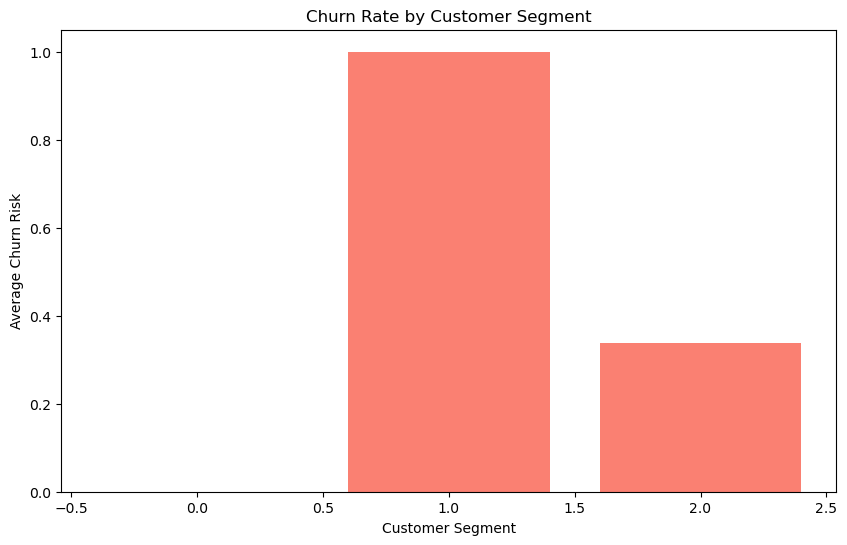

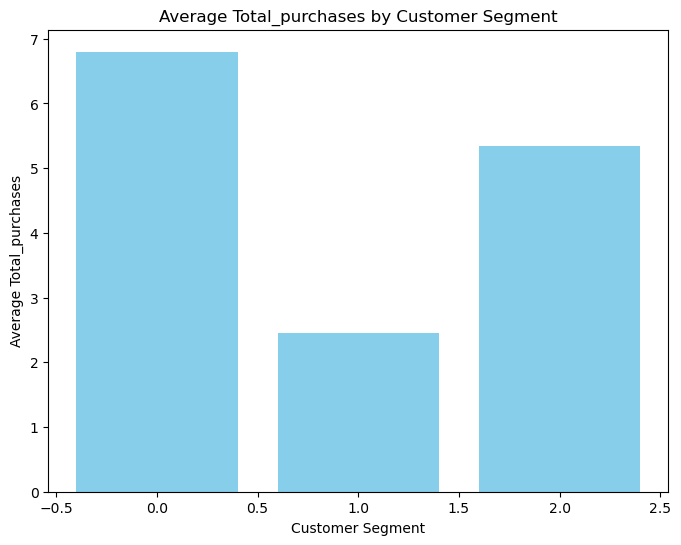

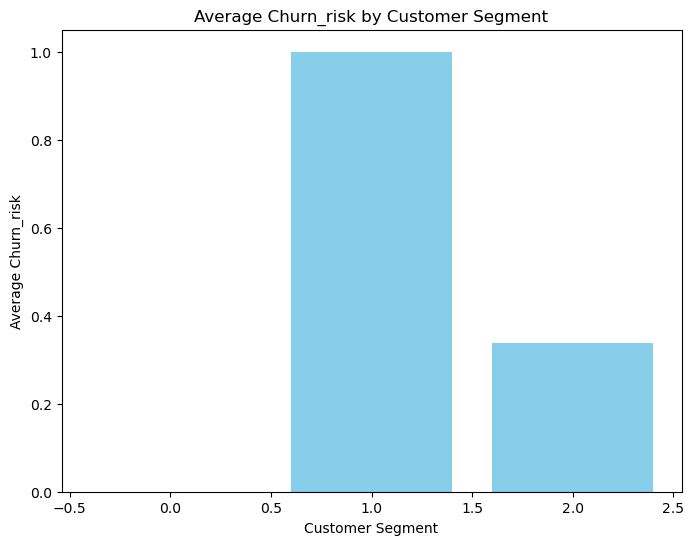

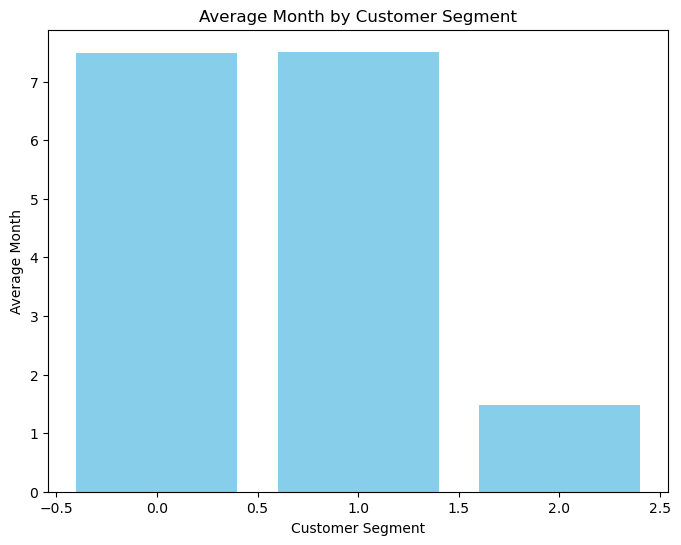

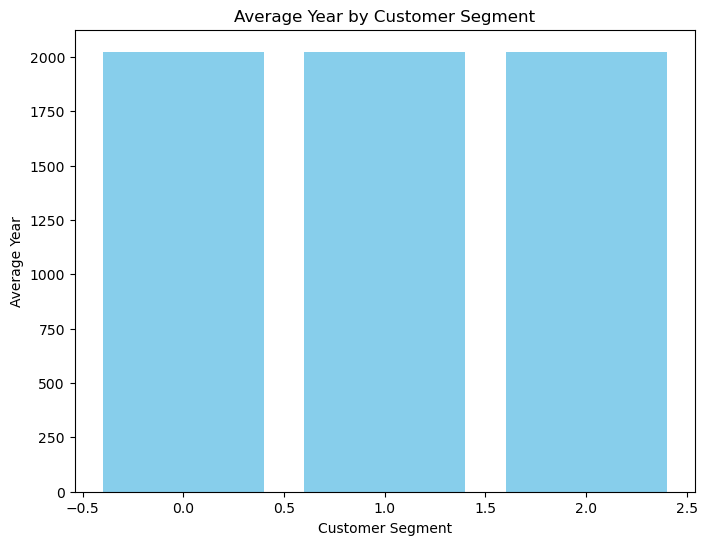

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load and prepare the dataset
df = pd.read_csv("new_retail_data.csv")  # Update with the actual path to your data
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')  # Standardize column names
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Ensure 'date' is in datetime format
df['total_purchases'] = pd.to_numeric(df['total_purchases'], errors='coerce')  # Ensure numeric format

# Extract year and month for grouping
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Calculate total monthly purchases per customer
monthly_purchases = df.groupby(['customer_id', 'year', 'month'])['total_purchases'].sum().reset_index()

# Define churn risk: fewer than 5 purchases in a month indicates churn risk
churn_threshold = 5
monthly_purchases['churn_risk'] = np.where(monthly_purchases['total_purchases'] < churn_threshold, 1, 0)

# Merge the churn risk back into the main DataFrame
df = df.merge(monthly_purchases[['customer_id', 'year', 'month', 'churn_risk']], on=['customer_id', 'year', 'month'], how='left')

# Define features for clustering
features = ['total_purchases', 'churn_risk', 'month', 'year']
df = df.dropna(subset=features)  # Drop rows with NaN values in selected features

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Apply KMeans clustering to segment customers
kmeans = KMeans(n_clusters=3, random_state=42)
df['segment'] = kmeans.fit_predict(X_scaled)

# Calculate the churn rate and characteristics for each segment
segment_churn = df.groupby('segment')['churn_risk'].mean().reset_index()
segment_characteristics = df.groupby('segment')[features].mean().reset_index()

# Display churn rate by segment
print("Segment Churn Rates:")
print(segment_churn)

# Display segment characteristics
print("\nSegment Characteristics:")
print(segment_characteristics)

# Visualize the churn rate per segment
plt.figure(figsize=(10, 6))
plt.bar(segment_churn['segment'], segment_churn['churn_risk'], color='salmon')
plt.title('Churn Rate by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Churn Risk')
plt.show()

# Additional visualization for segment characteristics
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.bar(segment_characteristics['segment'], segment_characteristics[feature], color='skyblue')
    plt.title(f'Average {feature.capitalize()} by Customer Segment')
    plt.xlabel('Customer Segment')
    plt.ylabel(f'Average {feature.capitalize()}')
    plt.show()


# Purpose

This analysis segments customers using KMeans clustering based on total monthly purchases, churn risk, and transaction date. By grouping customers into segments, it identifies patterns in churn risk, showing the average churn rate and customer characteristics for each segment. The purpose is to highlight which customer groups are most likely to disengage, using factors like purchase frequency and seasonal trends. This helps in creating targeted marketing or retention strategies tailored to specific at-risk customer segments, ultimately improving engagement and loyalty.

In [103]:
# taabular

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load and prepare the dataset
df = pd.read_csv("new_retail_data.csv")  # Update with the actual path to your data
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')  # Standardize column names
df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Ensure 'date' is in datetime format
df['total_purchases'] = pd.to_numeric(df['total_purchases'], errors='coerce')  # Ensure numeric format

# Extract year and month for grouping
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Calculate total monthly purchases per customer
monthly_purchases = df.groupby(['customer_id', 'year', 'month'])['total_purchases'].sum().reset_index()

# Define churn risk: fewer than 5 purchases in a month indicates churn risk
churn_threshold = 5
monthly_purchases['churn_risk'] = np.where(monthly_purchases['total_purchases'] < churn_threshold, 1, 0)

# Merge the churn risk back into the main DataFrame
df = df.merge(monthly_purchases[['customer_id', 'year', 'month', 'churn_risk']], on=['customer_id', 'year', 'month'], how='left')

# Define features for clustering
features = ['total_purchases', 'churn_risk', 'month', 'year']
df = df.dropna(subset=features)  # Drop rows with NaN values in selected features

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Apply KMeans clustering to segment customers
kmeans = KMeans(n_clusters=3, random_state=42)
df['segment'] = kmeans.fit_predict(X_scaled)

# Calculate the churn rate and characteristics for each segment
segment_churn = df.groupby('segment')['churn_risk'].mean().reset_index()
segment_characteristics = df.groupby('segment')[features].mean().reset_index()

# Display churn rate by segment in tabular form
print("Segment Churn Rates:")
print(segment_churn)

# Display segment characteristics in tabular form
print("\nSegment Characteristics:")
print(segment_characteristics)


Segment Churn Rates:
   segment  churn_risk
0        0    0.000000
1        1    1.000000
2        2    0.336915

Segment Characteristics:
   segment  total_purchases  churn_risk     month    year
0        0         6.798292    0.000000  7.492689  2023.0
1        1         2.455666    1.000000  7.508465  2023.0
2        2         5.343798    0.336915  1.485048  2024.0


# Elaboration

The bar chart visualization identifies customer segments with varying churn risks and highlights distinct characteristics for each group. Segment 1 has the highest churn risk, with a rate of 1.00, indicating that every customer in this segment is classified as at-risk. These customers also have the lowest average monthly purchases, at just 2.46, suggesting low engagement. In contrast, Segment 0 shows no churn risk (0.00), with an average of 6.80 monthly purchases, indicating a more active customer group. Segment 2 has a moderate churn risk of 0.34 and an intermediate purchase average of 5.34, suggesting a mixed engagement pattern.

The segment analysis reveals that Segment 1 customers are more likely to churn, with low purchase frequency and consistent patterns around mid-2023, suggesting they may require re-engagement strategies. Segment 2, with a partial churn rate, shows potential for improvement but may need specific incentives to boost activity. Segment 0, showing no churn risk, can be nurtured to maintain loyalty.

Overall, these insights help in designing tailored marketing and retention strategies for each segment. Segment 1 could benefit from targeted offers or loyalty programs, while Segments 0 and 2 may require periodic engagement to maintain or increase their activity.

# Question 4: What marketing strategies can be developed to improve engagement with disengaging customers?


Top Product Categories for High Churn-risk Customers:
  product_category  count
0      Electronics  23642
1          Grocery  22104
2         Clothing  18126
3            Books  18106
4       Home Decor  18028


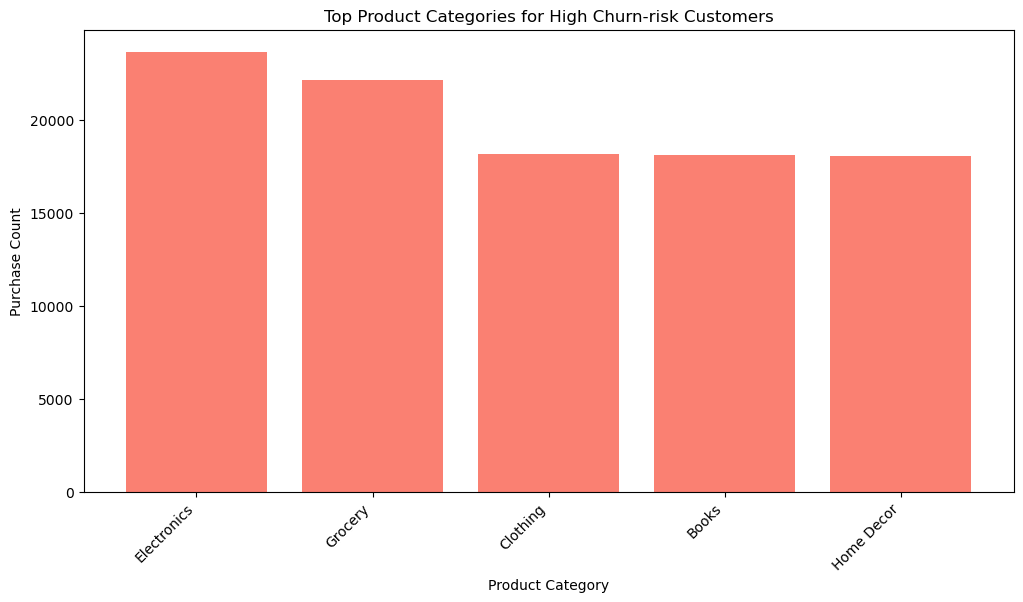

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset and ensure proper column formatting
df = pd.read_csv("new_retail_data.csv")  # Update with actual path
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')  # Standardize column names

# Convert 'date' column to datetime and 'total_purchases' to numeric
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['total_purchases'] = pd.to_numeric(df['total_purchases'], errors='coerce')

# Extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Calculate total monthly purchases per customer
monthly_purchases = df.groupby(['customer_id', 'year', 'month'])['total_purchases'].sum().reset_index()

# Define churn threshold: less than 5 purchases in any month indicates churn risk
churn_threshold = 5
monthly_purchases['churn_risk'] = np.where(monthly_purchases['total_purchases'] < churn_threshold, 1, 0)

# Merge churn risk back to main DataFrame for product analysis
df = df.merge(monthly_purchases[['customer_id', 'year', 'month', 'churn_risk']], on=['customer_id', 'year', 'month'], how='left')

# Filter data for high churn-risk customers
high_churn_df = df[df['churn_risk'] == 1]

# Analyze product categories for high churn-risk customers
product_analysis = high_churn_df['product_category'].value_counts().reset_index()
product_analysis.columns = ['product_category', 'count']

# Display top product categories purchased by high churn-risk customers
print("Top Product Categories for High Churn-risk Customers:")
print(product_analysis.head(10))

# Visualization of top product categories for high churn-risk customers
plt.figure(figsize=(12, 6))
plt.bar(product_analysis['product_category'].head(10), product_analysis['count'].head(10), color='salmon')
plt.title('Top Product Categories for High Churn-risk Customers')
plt.xlabel('Product Category')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45, ha='right')
plt.show()


# Purpose

This analysis identifies the top product categories frequently purchased by customers with a high churn risk (those with less than five monthly purchases). By isolating these high-risk customers, the analysis reveals which product types they are most likely to buy, giving valuable insights into their purchase behavior. Understanding these trends can inform targeted marketing efforts aimed at re-engaging disengaging customers, allowing for more effective inventory management and promotional strategies focused on products that may resonate best with at-risk customers.

In [104]:
# tabular

import numpy as np
import pandas as pd

# Load dataset and ensure proper column formatting
df = pd.read_csv("new_retail_data.csv")  # Update with the actual path
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')  # Standardize column names

# Convert 'date' column to datetime and 'total_purchases' to numeric
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['total_purchases'] = pd.to_numeric(df['total_purchases'], errors='coerce')

# Extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Calculate total monthly purchases per customer
monthly_purchases = df.groupby(['customer_id', 'year', 'month'])['total_purchases'].sum().reset_index()

# Define churn threshold: less than 5 purchases in any month indicates churn risk
churn_threshold = 5
monthly_purchases['churn_risk'] = np.where(monthly_purchases['total_purchases'] < churn_threshold, 1, 0)

# Merge churn risk back to main DataFrame for product analysis
df = df.merge(monthly_purchases[['customer_id', 'year', 'month', 'churn_risk']], on=['customer_id', 'year', 'month'], how='left')

# Filter data for high churn-risk customers
high_churn_df = df[df['churn_risk'] == 1]

# Analyze product categories for high churn-risk customers
product_analysis = high_churn_df['product_category'].value_counts().reset_index()
product_analysis.columns = ['product_category', 'count']

# Display top product categories purchased by high churn-risk customers in tabular form
print("Top Product Categories for High Churn-risk Customers:")
print(product_analysis.head(10))


Top Product Categories for High Churn-risk Customers:
  product_category  count
0      Electronics  23642
1          Grocery  22104
2         Clothing  18126
3            Books  18106
4       Home Decor  18028


# Elaboration

The bar chart visualization highlights the top product categories purchased by high churn-risk customers, revealing key opportunities for targeted marketing strategies. The highest purchases by at-risk customers are in Electronics, with 23,642 transactions, indicating that this category could benefit from re-engagement efforts, such as personalized offers or discounts on complementary products. Grocery follows closely, with 22,104 purchases, suggesting that high churn-risk customers might be interested in essentials and could respond to targeted loyalty programs or subscription offers.

Other popular categories among disengaging customers include Clothing (18,126 purchases), Books (18,106 purchases), and Home Decor (18,028 purchases). These categories provide additional insights into customer preferences, which can be leveraged for specialized promotions, such as bundled deals in Clothing or seasonal recommendations in Home Decor.

By understanding these product preferences, companies can create marketing strategies tailored to re-engage these high-risk customers. For example, offering exclusive deals on Electronics or providing personalized recommendations in frequently purchased categories may entice disengaged customers to increase their activity. This targeted approach not only enhances engagement but also improves customer retention by addressing specific interests and spending patterns of at-risk customers.